In [ ]:
# Install necessary libraries
!pip install diffusers
!pip install transformers
!pip install Pillow
!pip install accelerate scipy safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from huggingface_hub import login

token = ""
login(token)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

What would you like to generate today? (Enter 'Exit' to end the conversation.)

You: delhi


  0%|          | 0/4 [00:00<?, ?it/s]

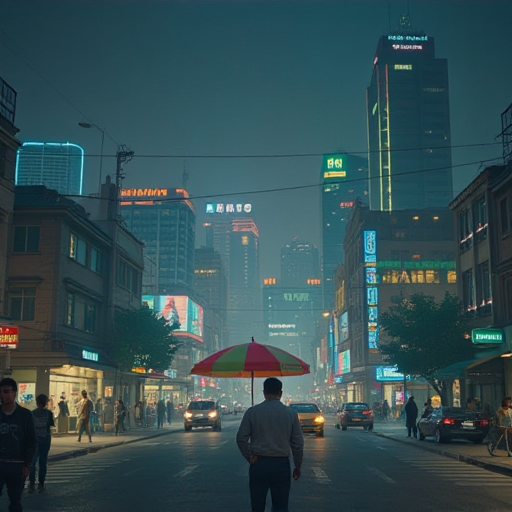

In [ ]:
import torch
from diffusers import DiffusionPipeline
from PIL import Image
import IPython.display as display

# Load the diffusion pipeline from a pretrained model, using bfloat16 for tensor types.
pipe = DiffusionPipeline.from_pretrained(
    "shuttleai/shuttle-jaguar", torch_dtype=torch.bfloat16
)

def chat():
    print("What would you like to generate today? (Enter 'Exit' to end the conversation.)\n")
    while True:
        prompt = input("You: ")
        if prompt.lower() == 'exit':
            print("Bye 👋")
            break

        # Generate image with lower resolution to save VRAM
        image = pipe(
            prompt,
            height=512,  # Adjust resolution for better performance
            width=512,
            guidance_scale=3.5,
            num_inference_steps=4,
            max_sequence_length=256,
            generator=torch.Generator("cpu").manual_seed(0)  # Ensures reproducibility
        ).images[0]

        # Show and display the image
        image.show()
        display.display(image)

chat()
